In [1]:
from dataset import CoverDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from models import get_models
import albumentations as A
import torch
from defs import *

/root/anaconda3/envs/album/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = CoverDataset(DATA_PATH, IMSIZE, None, True, False)
train_dataloader = DataLoader(
    dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, drop_last=True
)

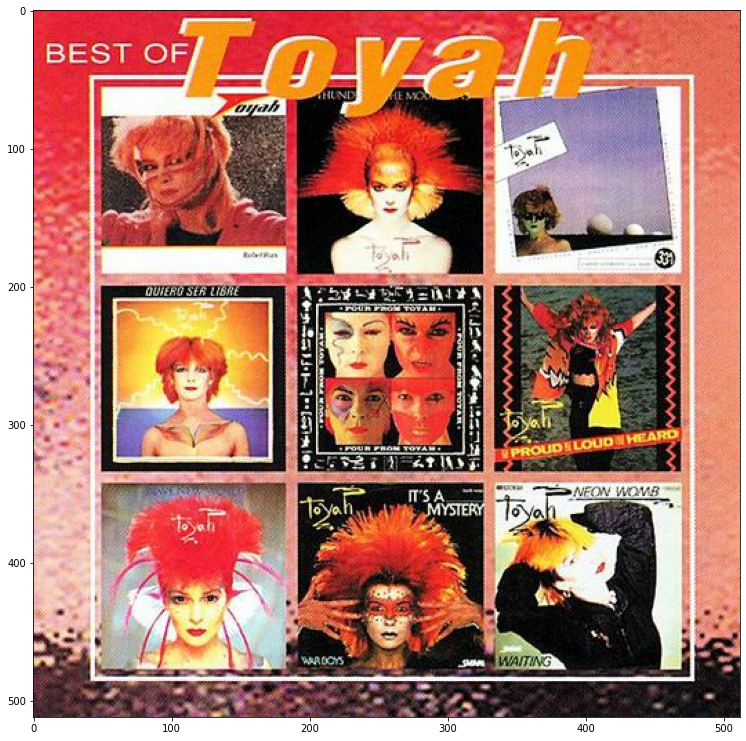

In [17]:
import cv2
plt.figure(figsize=(13,13))
plt.imshow(cv2.imread(dataset.images[-7])[:,:,::-1])

In [2]:
from diffusers import DDPMScheduler, DDPMPipeline
from evaluate import evaluate
DEVICE = 'cuda:2'
model = get_models(IMSIZE).to(DEVICE)

In [3]:
model = model.from_pretrained('results/weights/unet')
model = model.to(DEVICE)
noise_scheduler = DDPMScheduler(num_train_timesteps=NUM_TRAIN_TIMESTEPS)

In [6]:
EVAL_BATCH_SIZE = 36
pipeline = DDPMPipeline(unet=model, scheduler=noise_scheduler)
evaluate(1000000, pipeline, size = 36)


100%|██████████| 1000/1000 [14:36<00:00,  1.14it/s]
